##### Ensure Proper Dependencies are imported

In [67]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

# Load Data File:
- Load Bitcoin Transaction Data File for the date of 5/12

In [68]:
data = pd.read_csv('DATA/bitcoin_5.12.csv', low_memory=False)
data.head()

,Unnamed: 0,hash,time,sum_btc,sum_usd
0,0,af3353722b9bdd252915439dec797bfefa49e578c2de5d...,09:49,0.02546707 BTC,$804.03
1,1,7659bc3625c440083615bf25f2ff30b4e2a21ee7b0efaa...,09:49,0.00131036 BTC,$41.37
2,2,c61a949514e00a5e0a2ca789277669f580f7d6ea6fb3a5...,09:49,0.04091526 BTC,"$1,291.74"
3,3,a692c365b1f65b86911e1c7fac4b1f44f7856ff8116444...,09:49,0.00910189 BTC,$287.36
4,4,83b09443edff26afa9ced164fec963a40ceb1979ee9f37...,09:49,41.87146491 BTC,"$1,321,932.39"


# Format Data for Audio Playback
- Turn "sum_usd" column from string to floats for reading
- normalize that data then Audify it

In [69]:
print(data.dtypes)
# remove $ from the usd prices column
data['sum_usd'] = data['sum_usd'].str.replace("[$,]","")
data['sum_usd'] = data['sum_usd'].astype(float)
print(data.dtypes)

Unnamed: 0     int64
hash          object
time          object
sum_btc       object
sum_usd       object
dtype: object
Unnamed: 0      int64
hash           object
time           object
sum_btc        object
sum_usd       float64
dtype: object


C:\Users\XBox9\AppData\Local\Temp/ipykernel_32624/1958934132.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['sum_usd'] = data['sum_usd'].str.replace("[$,]","")


In [79]:
print(data.shape)

# get the last column of data
wave = data.iloc[:,-1]

print(wave.shape)

(127147, 5)
(127147,)


In [80]:
import math

def normalize(x, dB):

    ampMax = np.amax(abs(x))
    ampTarget = math.pow(10, dB / 20)     
    normFactor = ampTarget / ampMax 
    
    # Return the normalized signal.
    return x * normFactor

In [91]:
wave = normalize(wave, 3)

sr = 44100 # sample rate
ipd.Audio(wave, rate=sr) # actual length is rounded down

# Export Audio

In [92]:
import soundfile as sf
sf.write('DATA/bitcoins.wav', wave, sr, 'PCM_24')

In [93]:
x, sr = librosa.load('DATA/bitcoins.wav')
print(librosa.get_duration(y=x, sr=sr))

(63574,)
22050
2.883174603174603


# Plot Waveform

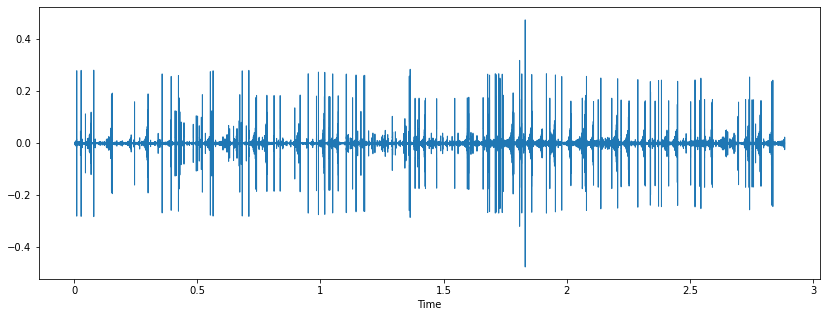

In [87]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

# Extract Data Features
   - Root Mean Square
 
   - Spectral Contrast
    
   -  Spectral Flatness

#### Root Mean Square
- Extract then plot the average "loudness"

Text(0.5, 1.0, 'RMS')

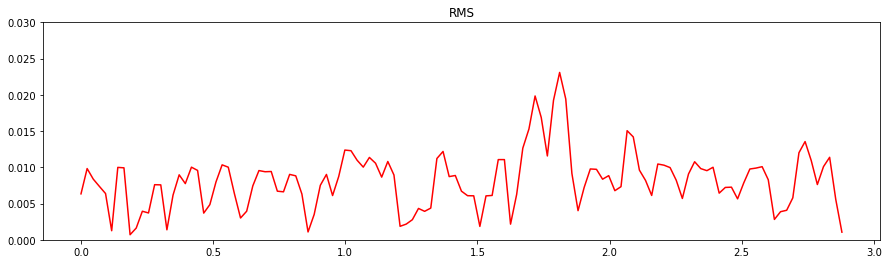

In [95]:
rms = librosa.feature.rms(y=x, frame_length=1024, hop_length=512)[0]
frames = range(len(rms))
t = librosa.frames_to_time(frames)
plt.figure(figsize=(15,4))
plt.plot(t, rms, color="r")
plt.ylim(0,0.03)
plt.title("RMS")

#### Spectral Contrast
- Extract then plot the Db Difference between the peaks and valleys of the waveform

Text(0.5, 1.0, 'Spectral Contrast')

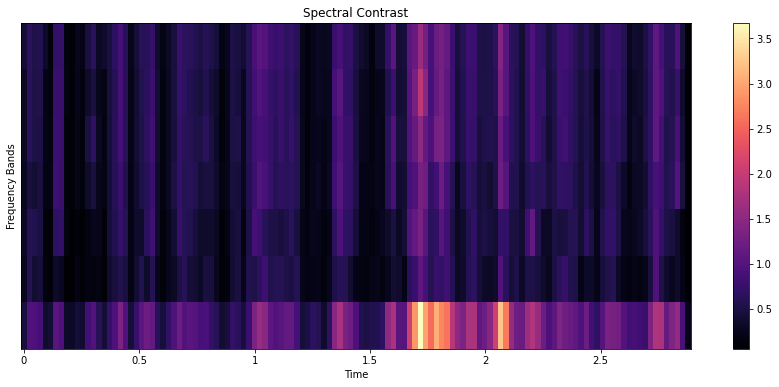

In [89]:
# Spectral Contrast gives us the decibel difference between the peaks and valleys in the spectrum
# I suspect this will help visualize the RMS, but also give us an idea of how clustered certain transaction values are
# these values are going to be somewhat "small" in size since it is using linear differences instead of the logarithmic diff
S = np.abs(librosa.stft(x))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr, linear=True)
plt.figure(figsize=(15,6))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel(ylabel='Frequency Bands')
plt.title('Spectral Contrast')

##### Spectral Flatness
- Extract then plot the likeness of the track from noise like to note like

Text(0.5, 1.0, 'Flatness')

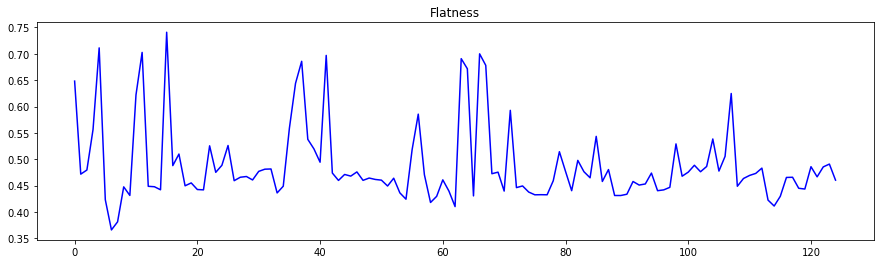

In [90]:
# Spectral Flatness gives us an idea of how noise-like the audio is
flat = librosa.feature.spectral_flatness(y=x)
plt.figure(figsize=(15,4))
plt.plot(flat[0], color="b")
plt.title("Flatness")

##### Commented Notes or Observations

In [98]:
# Large spikes in the audio == large transactions have just occured
# coincidence that they happen near the end of the day?
# Abstract Data "Non-Physical": Price of transactions happening on the blockchain

In [97]:
# easily can track amount / summary of transactions during a given time period if the dataset was large enough
# this would be useful for trying to figure out trends in bitcoin transactions around certain dates
# makes more sense slower, the faster this goes the harder it is to tell how many transactions and the exact time of them are.